# **1. Perkenalan Dataset**


Dataset yang digunakan dalam proyek ini berkaitan dengan Garis Kemiskinan di Indonesia, yang mencakup informasi tentang tingkat kemiskinan di berbagai provinsi berdasarkan berbagai faktor seperti jenis konsumsi (makanan & non-makanan), daerah (perkotaan & perdesaan), dan periode waktu.

1. **Sumber Dataset**:
- Dataset ini dapat diakses di Kaggle dengan nama **Dataset Kesejahteraan Pekerja Indonesia**.
- Data ini memuat data **Garis Kemiskinan per Kapita**, dengan pemisahan berdasarkan provinsi, tahun, periode survei, jenis pengeluaran, dan daerah tempat tinggal.
2. **Ketentuan Dataset**:
- Mengelompokkan provinsi di Indonesia berdasarkan pola garis kemiskinan mereka.
- Menentukan apakah ada provinsi dengan karakteristik kemiskinan yang mirip untuk membantu analisis sosial dan ekonomi.
- Mengidentifikasi pola perbedaan kemiskinan antara perkotaan dan perdesaan.

# **2. Import Library**

Pada tahap ini, kita akan mengimpor pustaka Python yang diperlukan untuk analisis data dan pembangunan model clustering.

In [1]:
import pandas as pd  # Untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Untuk visualisasi data
from yellowbrick.cluster import KElbowVisualizer  # Untuk menentukan jumlah cluster optimal
from sklearn.cluster import KMeans, DBSCAN  # Algoritma clustering
from sklearn.metrics import silhouette_score  # Untuk evaluasi clustering
from sklearn.preprocessing import MinMaxScaler, LabelEncoder # Untuk preprocessing
import seaborn as sns  # Untuk visualisasi data

# **3. Memuat Dataset**

Pada tahap ini, kita akan memuat dataset ke dalam notebook, untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar dan memastikan bahwa data sudah berhasil diimpor serta sesuai untuk analisis lebih lanjut.

In [2]:
# Memuat dataset
df = pd.read_csv('Dataset_clustering.csv')

# Menampilkan 5 baris pertama dataset
print("5 Baris Pertama Dataset:")
display(df.head())

# Menampilkan informasi dataset
print("\nInformasi Dataset:")
print(df.info())

# Menampilkan jumlah nilai yang hilang di setiap kolom
print("\nCek Missing Values:")
print(df.isnull().sum())

# Menampilkan statistik deskriptif untuk data numerik
print("\nStatistik Deskriptif:")
display(df.describe())

5 Baris Pertama Dataset:


,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB
None

Cek Missing Values:
provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
dtype: int64

Statistik Deskriptif:


,tahun,gk
count,5460.000000,5261.000000
mean,2018.115385,303904.185516
std,2.577159,158176.024903
min,2013.000000,48561.000000
25%,2016.000000,144674.000000
50%,2018.000000,313294.000000
75%,2020.000000,410188.000000
max,2022.000000,872843.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, kita akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
#  Mengecek struktur dataset
print("Ukuran Dataset:", df.shape)
print("\nInformasi Dataset:")
print(df.info())

Ukuran Dataset: (5460, 6)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB
None


In [4]:
# Mengecek jumlah missing values lagi
print("\nCek Missing Values:")
print(df.isnull().sum())

# Mengisi missing values pada `gk` dengan median
df = df.assign(gk=df['gk'].fillna(df['gk'].median()))

# Mengecek ulang apakah masih ada missing values
print("\nMissing Values Setelah Imputasi:")
print(df.isnull().sum())



Cek Missing Values:
provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
dtype: int64

Missing Values Setelah Imputasi:
provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
dtype: int64


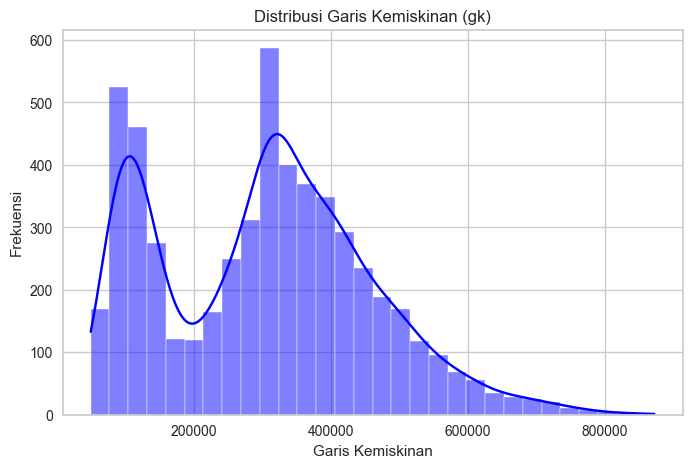

In [5]:
# Histogram distribusi `gk`
plt.figure(figsize=(8,5))
sns.histplot(df['gk'], bins=30, kde=True, color='blue')
plt.title("Distribusi Garis Kemiskinan (gk)")
plt.xlabel("Garis Kemiskinan")
plt.ylabel("Frekuensi")
plt.show()

In [6]:
# Cek berapa banyak provinsi yang memiliki garis kemiskinan di bawah 200.000
low_gk_count = df[df['gk'] <= 200000].shape[0]
print(f"Jumlah provinsi dengan garis kemiskinan <= 200.000: {low_gk_count}")

# Cek berapa banyak provinsi yang memiliki garis kemiskinan di rentang 200.000 – 400.000
mid_gk_count = df[df['gk'].between(200000, 400000)].shape[0]
print(f"Jumlah provinsi dengan garis kemiskinan antara 200.000 – 400.000: {mid_gk_count}")

Jumlah provinsi dengan garis kemiskinan <= 200.000: 1603
Jumlah provinsi dengan garis kemiskinan antara 200.000 – 400.000: 2416


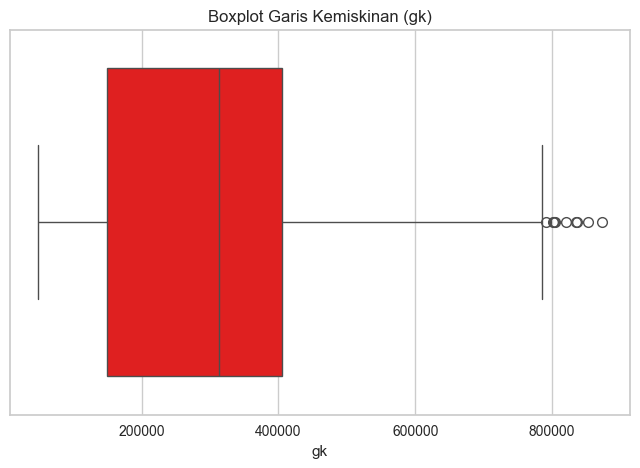

In [7]:
# Boxplot untuk mendeteksi outlier pada `gk`
plt.figure(figsize=(8,5))
sns.boxplot(x=df['gk'], color='red')
plt.title("Boxplot Garis Kemiskinan (gk)")
plt.show()

In [8]:
# Cek provinsi mana saja yang memiliki gk > 600.000.
outliers = df[df['gk'] > 600000]
display(outliers[['provinsi', 'gk']])

,provinsi,gk
146,ACEH,606394.0
147,ACEH,646232.0
151,ACEH,602900.0
155,ACEH,617293.0
303,SUMATERA UTARA,615227.0
...,...,...
5298,PAPUA,608205.0
5299,PAPUA,646116.0
5301,PAPUA,600795.0
5302,PAPUA,629175.0


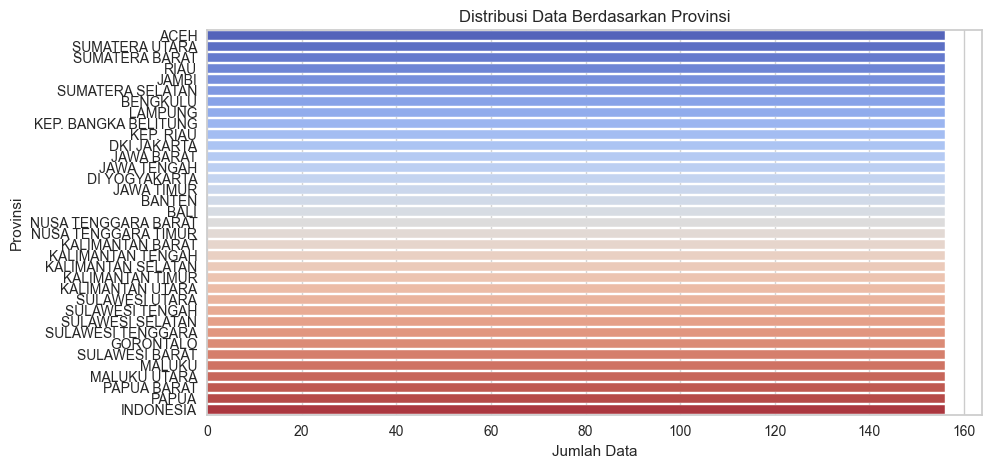

In [9]:
# Visualisasi distribusi provinsi
plt.figure(figsize=(10,5))
sns.countplot(y=df['provinsi'], hue=df['provinsi'], order=df['provinsi'].value_counts().index, palette='coolwarm', legend=False)
plt.title("Distribusi Data Berdasarkan Provinsi")
plt.xlabel("Jumlah Data")
plt.ylabel("Provinsi")
plt.show()

In [10]:
# Cek apakah provinsi "INDONESIA" ada
print("Cek apakah provinsi INDONESIA ada")
print(df['provinsi'].unique())

# Akan dihapus di data preprocessing

Cek apakah provinsi INDONESIA ada
['ACEH' 'SUMATERA UTARA' 'SUMATERA BARAT' 'RIAU' 'JAMBI'
 'SUMATERA SELATAN' 'BENGKULU' 'LAMPUNG' 'KEP. BANGKA BELITUNG'
 'KEP. RIAU' 'DKI JAKARTA' 'JAWA BARAT' 'JAWA TENGAH' 'DI YOGYAKARTA'
 'JAWA TIMUR' 'BANTEN' 'BALI' 'NUSA TENGGARA BARAT' 'NUSA TENGGARA TIMUR'
 'KALIMANTAN BARAT' 'KALIMANTAN TENGAH' 'KALIMANTAN SELATAN'
 'KALIMANTAN TIMUR' 'KALIMANTAN UTARA' 'SULAWESI UTARA' 'SULAWESI TENGAH'
 'SULAWESI SELATAN' 'SULAWESI TENGGARA' 'GORONTALO' 'SULAWESI BARAT'
 'MALUKU' 'MALUKU UTARA' 'PAPUA BARAT' 'PAPUA' 'INDONESIA']


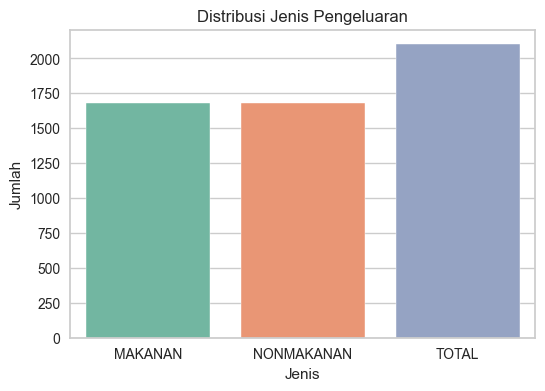

In [11]:
# Visualisasi distribusi jenis pengeluaran
plt.figure(figsize=(6,4))
sns.countplot(x=df['jenis'], hue=df['jenis'], palette='Set2', legend=False)
plt.title("Distribusi Jenis Pengeluaran")
plt.xlabel("Jenis")
plt.ylabel("Jumlah")
plt.show()

In [12]:
# Total semua kategori jenis pengeluaran
print(df['jenis'].value_counts())

jenis
TOTAL         2100
MAKANAN       1680
NONMAKANAN    1680
Name: count, dtype: int64


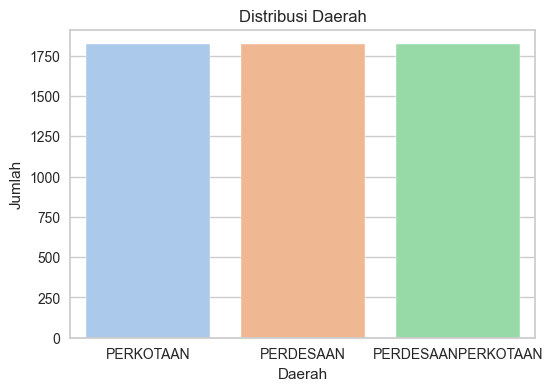

In [13]:
# Visualisasi distribusi daerah (perkotaan/perdesaan)
plt.figure(figsize=(6,4))
sns.countplot(x=df['daerah'], hue=df['daerah'], palette='pastel', legend=False)
plt.title("Distribusi Daerah")
plt.xlabel("Daerah")
plt.ylabel("Jumlah")
plt.show()

In [14]:
# Total semua kategori daerah
print(df['daerah'].value_counts())

daerah
PERKOTAAN             1820
PERDESAAN             1820
PERDESAANPERKOTAAN    1820
Name: count, dtype: int64


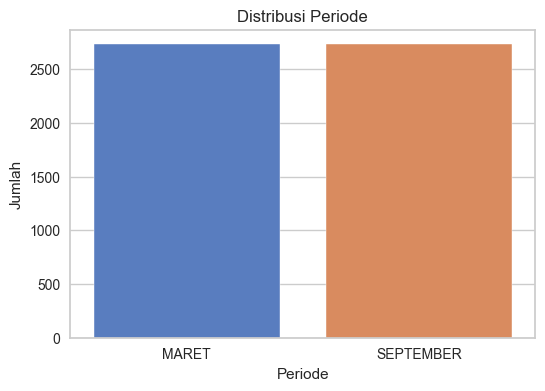

In [15]:
# Visualisasi distribusi periode (Maret/September)
plt.figure(figsize=(6,4))
sns.countplot(x=df['periode'], hue=df['periode'], palette='muted', legend=False)
plt.title("Distribusi Periode")
plt.xlabel("Periode")
plt.ylabel("Jumlah")
plt.show()

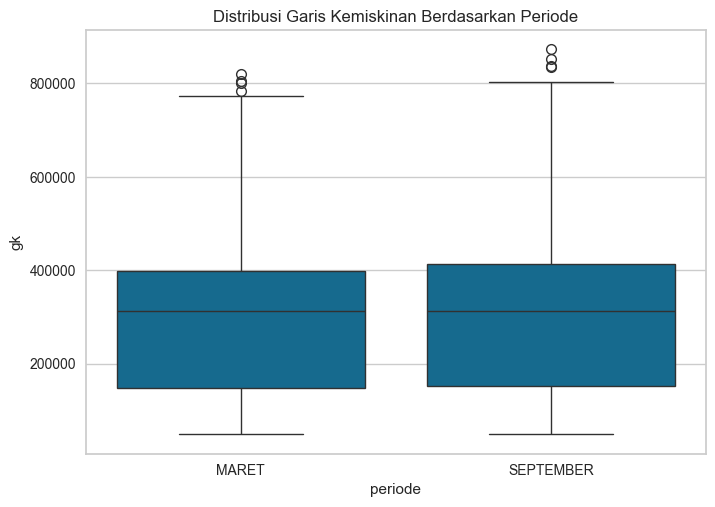

In [16]:
# Cek perubahan signifikan dalam garis kemiskinan (gk) antara kedua periode
sns.boxplot(x=df['periode'], y=df['gk'])
plt.title("Distribusi Garis Kemiskinan Berdasarkan Periode")
plt.show()

In [17]:
# Total semua kategori periode
print(df['periode'].value_counts())

# Cek apakah hanya ada dua kategori valid: "MARET" dan "SEPTEMBER"
print(df['periode'].unique())

periode
MARET        2730
SEPTEMBER    2730
Name: count, dtype: int64
['MARET' 'SEPTEMBER']


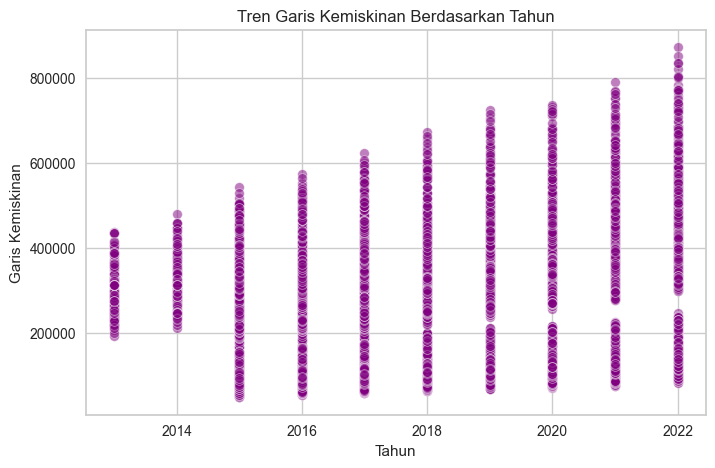

In [18]:
# Scatter plot untuk melihat hubungan antara `tahun` dan `gk`
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['tahun'], y=df['gk'], alpha=0.5, color='purple')
plt.title("Tren Garis Kemiskinan Berdasarkan Tahun")
plt.xlabel("Tahun")
plt.ylabel("Garis Kemiskinan")
plt.show()

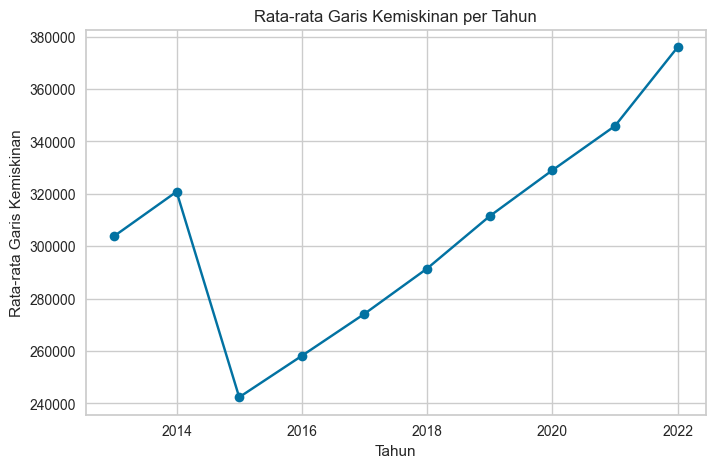

In [19]:
# Cek Tren Pertumbuhan Garis Kemiskinan dari Tahun ke Tahun
df.groupby('tahun')['gk'].mean().plot(kind='line', marker='o', figsize=(8,5))
plt.title("Rata-rata Garis Kemiskinan per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata Garis Kemiskinan")
plt.grid(True)
plt.show()

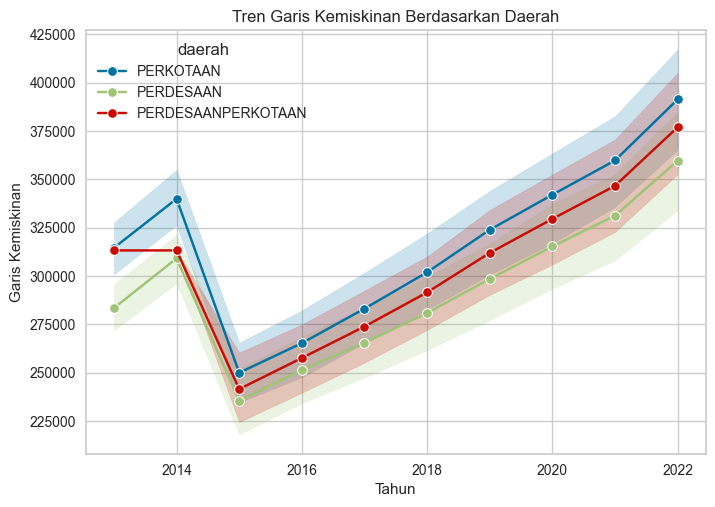

In [20]:
# Membandingkan Tren antara Perkotaan dan Perdesaan
sns.lineplot(x='tahun', y='gk', hue='daerah', data=df, marker='o')
plt.title("Tren Garis Kemiskinan Berdasarkan Daerah")
plt.xlabel("Tahun")
plt.ylabel("Garis Kemiskinan")
plt.show()

In [21]:
# Cek tahun dengan kenaikan terbesar dan provinsi mana yang terdampak
df.groupby(['tahun', 'provinsi'])['gk'].mean().reset_index().sort_values(by=['tahun', 'gk'], ascending=False).head(10)

,tahun,provinsi,gk
332,2022,KEP. BANGKA BELITUNG,552162.611111
331,2022,KALIMANTAN UTARA,520573.222222
330,2022,KALIMANTAN TIMUR,497527.777778
333,2022,KEP. RIAU,465784.888889
340,2022,PAPUA BARAT,459970.055556
320,2022,DKI JAKARTA,440503.555556
339,2022,PAPUA,439224.944444
335,2022,MALUKU,435018.222222
347,2022,SUMATERA BARAT,421525.888889
341,2022,RIAU,421092.333333


In [22]:
# Filter data hanya untuk tahun 2015
df_2015 = df[df['tahun'] == 2015]

# Melihat provinsi dengan garis kemiskinan tertinggi tahun 2015
df_2015.groupby('provinsi')['gk'].mean().reset_index().sort_values(by='gk', ascending=False).head(10)

,provinsi,gk
17,KEP. BANGKA BELITUNG,339473.000000
5,DKI JAKARTA,324526.166667
16,KALIMANTAN UTARA,322136.944444
15,KALIMANTAN TIMUR,320885.222222
18,KEP. RIAU,305186.444444
25,PAPUA BARAT,303340.888889
24,PAPUA,274967.944444
26,RIAU,272376.111111
20,MALUKU,268318.333333
0,ACEH,266577.333333


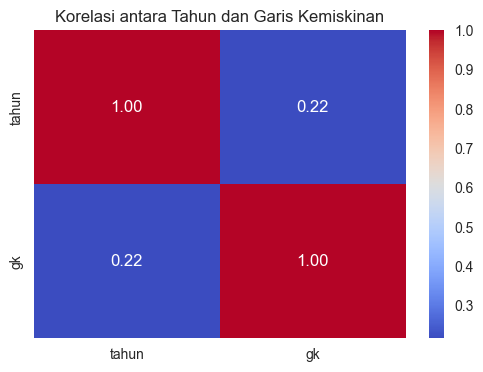

In [23]:
# Heatmap korelasi
plt.figure(figsize=(6,4))
sns.heatmap(df[['tahun', 'gk']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antara Tahun dan Garis Kemiskinan")
plt.show()

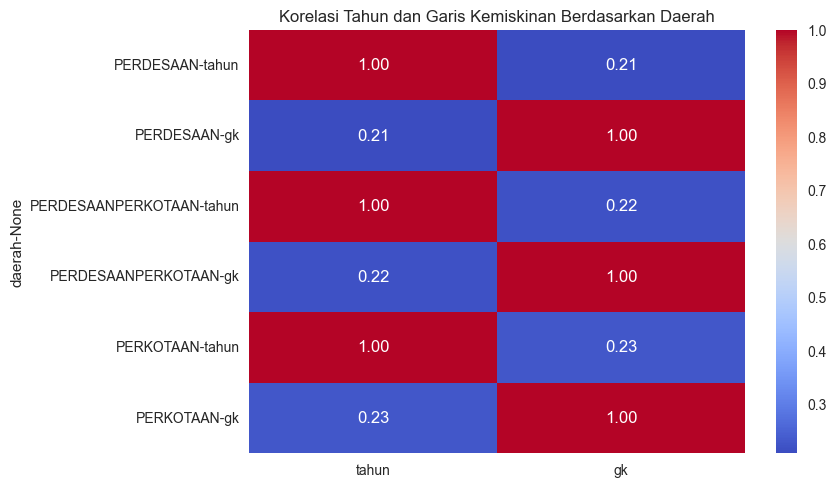

In [24]:
# Heatmap korelasi berdasarkan Daerah dan Provinsi
sns.heatmap(df.groupby('daerah')[['tahun', 'gk']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Tahun dan Garis Kemiskinan Berdasarkan Daerah")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [25]:
# Cek jumlah data duplikat sebelum penghapusan
print(f"Jumlah data duplikat sebelum dihapus: {df.duplicated().sum()}")

# Hapus duplikat jika ada
df = df.drop_duplicates()

# Cek ulang jumlah data duplikat setelah penghapusan
print(f"Jumlah data duplikat setelah dihapus: {df.duplicated().sum()}")

Jumlah data duplikat sebelum dihapus: 0
Jumlah data duplikat setelah dihapus: 0


In [26]:
# Cek apakah "INDONESIA" ada
print("Sebelum penghapusan:")
print(df['provinsi'].unique())

# Menghapus baris dengan provinsi "INDONESIA"
df = df[df['provinsi'] != 'INDONESIA']

# Cek apakah "INDONESIA" masih ada setelah dihapus
print("\nSetelah penghapusan:")
print(df['provinsi'].unique())  # Menampilkan daftar provinsi unik setelah dihapus

Sebelum penghapusan:
['ACEH' 'SUMATERA UTARA' 'SUMATERA BARAT' 'RIAU' 'JAMBI'
 'SUMATERA SELATAN' 'BENGKULU' 'LAMPUNG' 'KEP. BANGKA BELITUNG'
 'KEP. RIAU' 'DKI JAKARTA' 'JAWA BARAT' 'JAWA TENGAH' 'DI YOGYAKARTA'
 'JAWA TIMUR' 'BANTEN' 'BALI' 'NUSA TENGGARA BARAT' 'NUSA TENGGARA TIMUR'
 'KALIMANTAN BARAT' 'KALIMANTAN TENGAH' 'KALIMANTAN SELATAN'
 'KALIMANTAN TIMUR' 'KALIMANTAN UTARA' 'SULAWESI UTARA' 'SULAWESI TENGAH'
 'SULAWESI SELATAN' 'SULAWESI TENGGARA' 'GORONTALO' 'SULAWESI BARAT'
 'MALUKU' 'MALUKU UTARA' 'PAPUA BARAT' 'PAPUA' 'INDONESIA']

Setelah penghapusan:
['ACEH' 'SUMATERA UTARA' 'SUMATERA BARAT' 'RIAU' 'JAMBI'
 'SUMATERA SELATAN' 'BENGKULU' 'LAMPUNG' 'KEP. BANGKA BELITUNG'
 'KEP. RIAU' 'DKI JAKARTA' 'JAWA BARAT' 'JAWA TENGAH' 'DI YOGYAKARTA'
 'JAWA TIMUR' 'BANTEN' 'BALI' 'NUSA TENGGARA BARAT' 'NUSA TENGGARA TIMUR'
 'KALIMANTAN BARAT' 'KALIMANTAN TENGAH' 'KALIMANTAN SELATAN'
 'KALIMANTAN TIMUR' 'KALIMANTAN UTARA' 'SULAWESI UTARA' 'SULAWESI TENGAH'
 'SULAWESI SELATAN' 'SULAWES

In [27]:
# Hitung Q1 (25%) dan Q3 (75%)
Q1 = df['gk'].quantile(0.25)
Q3 = df['gk'].quantile(0.75)

# Hitung IQR
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas
batas_bawah = Q1 - (1.5 * IQR)
batas_atas = Q3 + (1.5 * IQR)

# Cek jumlah outlier
outliers = df[(df['gk'] < batas_bawah) | (df['gk'] > batas_atas)]
print(f"Jumlah Outlier: {outliers.shape[0]}")

# 9 data ini tidak signifikan dibanding total data (~5460), maka outlier mungkin tidak terlalu mengganggu

Jumlah Outlier: 9


In [28]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi kolom `gk`
df['gk_scaled'] = scaler.fit_transform(df[['gk']])

# Cek hasil normalisasi
df[['gk', 'gk_scaled']].head()

,gk,gk_scaled
0,293697.0,0.297393
1,302128.0,0.307622
2,306243.0,0.312614
3,319768.0,0.329022
4,297479.0,0.301982


In [38]:
# Inisialisasi Label Encoder
label_enc = LabelEncoder()

# Encoding setiap kolom kategorikal
df['provinsi_encoded'] = label_enc.fit_transform(df['provinsi'])
df['jenis_encoded'] = label_enc.fit_transform(df['jenis'])
df['daerah_encoded'] = label_enc.fit_transform(df['daerah'])
df['periode_encoded'] = label_enc.fit_transform(df['periode'])

# Cek hasil encoding
df[['provinsi', 'provinsi_encoded', 'jenis', 'jenis_encoded']]

,provinsi,provinsi_encoded,jenis,jenis_encoded
0,ACEH,0,MAKANAN,0
1,ACEH,0,MAKANAN,0
2,ACEH,0,MAKANAN,0
3,ACEH,0,MAKANAN,0
4,ACEH,0,MAKANAN,0
...,...,...,...,...
5299,PAPUA,23,TOTAL,2
5300,PAPUA,23,TOTAL,2
5301,PAPUA,23,TOTAL,2
5302,PAPUA,23,TOTAL,2


In [30]:
# Definisikan batas rentang garis kemiskinan
bins = [0, 200000, 400000, 600000, df['gk'].max()]
labels = ['Sangat Rendah', 'Rendah', 'Menengah', 'Tinggi']

# Membuat kategori berdasarkan rentang
df['gk_category'] = pd.cut(df['gk'], bins=bins, labels=labels)

# Cek distribusi kategori
df['gk_category'].value_counts()

gk_category
Rendah           2338
Sangat Rendah    1555
Menengah         1222
Tinggi            189
Name: count, dtype: int64

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [31]:
#Type your code here

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [32]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [33]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [34]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [35]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [36]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [37]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260
- **Rata-rata Spending Score (1-100):** 56.48
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540
- **Rata-rata Spending Score (1-100):** 82.13
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000
- **Rata-rata Spending Score (1-100):** 18.63
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.